In [68]:
# import rarfile, csv
import pandas as pd
import numpy as np
from datetime import datetime

In [10]:
# rar_path = rarfile.RarFile("2020_01_Gener_BicingNou_ESTACIONS.rar")
# csv_file_name = "2020_01_Gener_BicingNou_ESTACIONS.csv"
# rar_file = rarfile.RarFile.open(rar_path, csv_file_name)
# csv_reader = csv.reader(rar_file, delimiter=',')

# # Should output first line of file (typically CSV header)
# print(csv_reader.next())

In [50]:
df = pd.read_csv('2020_01_Gener_BicingNou_ESTACIONS.zip', compression='zip', header=0, sep=',', quotechar='"')

In [51]:
df

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,last_reported,is_charging_station,status,last_updated,ttl
0,1,21,21,0,23,1,1,1,1.577833e+09,True,IN_SERVICE,1577833223,28
1,2,10,9,1,16,1,1,1,1.577833e+09,True,IN_SERVICE,1577833223,28
2,3,15,15,0,9,1,1,1,1.577833e+09,True,IN_SERVICE,1577833223,28
3,4,8,8,0,13,1,1,1,1.577833e+09,True,IN_SERVICE,1577833223,28
4,5,14,11,3,24,1,1,1,1.577833e+09,True,IN_SERVICE,1577833223,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398703,474,7,5,2,8,1,1,1,1.580511e+09,True,IN_SERVICE,1580511301,10
3398704,492,2,2,0,22,1,1,1,1.580511e+09,True,IN_SERVICE,1580511301,10
3398705,494,0,0,0,24,1,1,1,1.580511e+09,True,IN_SERVICE,1580511301,10
3398706,495,3,2,1,19,1,1,1,1.580511e+09,True,IN_SERVICE,1580511301,10


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398708 entries, 0 to 3398707
Data columns (total 13 columns):
station_id                              int64
num_bikes_available                     int64
num_bikes_available_types.mechanical    int64
num_bikes_available_types.ebike         int64
num_docks_available                     int64
is_installed                            int64
is_renting                              int64
is_returning                            int64
last_reported                           float64
is_charging_station                     bool
status                                  object
last_updated                            int64
ttl                                     int64
dtypes: bool(1), float64(1), int64(10), object(1)
memory usage: 314.4+ MB


In [46]:
#df['last_reported'] = df['last_reported'].astype(int)

df['last_reported'] = np.int64(df['last_reported'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398708 entries, 0 to 3398707
Data columns (total 14 columns):
station_id                              int64
num_bikes_available                     int64
num_bikes_available_types.mechanical    int64
num_bikes_available_types.ebike         int64
num_docks_available                     int64
is_installed                            int64
is_renting                              int64
is_returning                            int64
last_reported                           int64
is_charging_station                     bool
status                                  object
last_updated                            int64
ttl                                     int64
last_reported_dt                        datetime64[ns]
dtypes: bool(1), datetime64[ns](1), int64(11), object(1)
memory usage: 340.3+ MB


In [55]:
df['last_reported_dt'] = pd.to_datetime(df['last_reported'],  unit = 's')

In [56]:
df['last_reported_dt']

0         2019-12-31 22:56:44
1         2019-12-31 22:57:58
2         2019-12-31 22:56:20
3         2019-12-31 22:58:50
4         2019-12-31 22:58:50
                  ...        
3398703   2020-01-31 22:54:35
3398704   2020-01-31 22:54:37
3398705   2020-01-31 22:53:53
3398706   2020-01-31 22:53:44
3398707   2020-01-31 22:51:06
Name: last_reported_dt, Length: 3398708, dtype: datetime64[ns]

In [61]:
# datetime.datetime(df['last_reported_dt'], tzinfo=tzoffset(None, 3600))

In [62]:
pd.Timestamp(np.int64(df['last_reported']))

TypeError: Cannot convert input [[1577833004 1577833078 1577832980 ... 1580511233 1580511224 1580511066]] of type <class 'numpy.ndarray'> to Timestamp

In [60]:
pd.Timestamp(df['last_reported_dt'])

TypeError: Cannot convert input [0         2019-12-31 22:56:44
1         2019-12-31 22:57:58
2         2019-12-31 22:56:20
3         2019-12-31 22:58:50
4         2019-12-31 22:58:50
                  ...        
3398703   2020-01-31 22:54:35
3398704   2020-01-31 22:54:37
3398705   2020-01-31 22:53:53
3398706   2020-01-31 22:53:44
3398707   2020-01-31 22:51:06
Name: last_reported_dt, Length: 3398708, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp

In [34]:
df['last_reported_dt2'] = pd.Timestamp(df['last_reported_dt'],  unit = 's')

TypeError: Cannot convert input [0         2019-12-31 22:56:44
1         2019-12-31 22:57:58
2         2019-12-31 22:56:20
3         2019-12-31 22:58:50
4         2019-12-31 22:58:50
                  ...        
3398703   2020-01-31 22:54:35
3398704   2020-01-31 22:54:37
3398705   2020-01-31 22:53:53
3398706   2020-01-31 22:53:44
3398707   2020-01-31 22:51:06
Name: last_reported_dt, Length: 3398708, dtype: datetime64[ns]] of type <class 'pandas.core.series.Series'> to Timestamp

In [35]:
Timestamp(numpy.datetime64('2012-05-01T01:00:00.000000'))

NameError: name 'Timestamp' is not defined

In [16]:
df

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,last_reported,is_charging_station,status,last_updated,ttl,last_reported_dt
0,1,21,21,0,23,1,1,1,1577833004,True,IN_SERVICE,1577833223,28,2019-12-31 22:56:44
1,2,10,9,1,16,1,1,1,1577833078,True,IN_SERVICE,1577833223,28,2019-12-31 22:57:58
2,3,15,15,0,9,1,1,1,1577832980,True,IN_SERVICE,1577833223,28,2019-12-31 22:56:20
3,4,8,8,0,13,1,1,1,1577833130,True,IN_SERVICE,1577833223,28,2019-12-31 22:58:50
4,5,14,11,3,24,1,1,1,1577833130,True,IN_SERVICE,1577833223,28,2019-12-31 22:58:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3398703,474,7,5,2,8,1,1,1,1580511275,True,IN_SERVICE,1580511301,10,2020-01-31 22:54:35
3398704,492,2,2,0,22,1,1,1,1580511277,True,IN_SERVICE,1580511301,10,2020-01-31 22:54:37
3398705,494,0,0,0,24,1,1,1,1580511233,True,IN_SERVICE,1580511301,10,2020-01-31 22:53:53
3398706,495,3,2,1,19,1,1,1,1580511224,True,IN_SERVICE,1580511301,10,2020-01-31 22:53:44


In [73]:
def station_timeline(station_id, selected_day):
    """
    Input :
    Output :
    """
    
    sub_df_selected_day = df[df[last_reported_dt] == selected_day]
    sub_df_selected_day['hour'] = sub_df_selected_day["last_reported_dt"].apply(lambda date : datetime.strptime(date, "%H-%M-%s"))
    
    station = sub_df_selected_day.query(f'station_id == {station_id}')
    station.plot(x='last_reported_dt' , y='num_bikes_available' , style='-')
    
    return station

In [64]:
pg_exposicio = df.query('station_id== 234')

In [72]:
pg_exposicio['hour'] = pg_exposicio["last_reported_dt"].apply(lambda date : datetime.strptime(date, "%H-%M-%s"))

TypeError: strptime() argument 1 must be str, not Timestamp

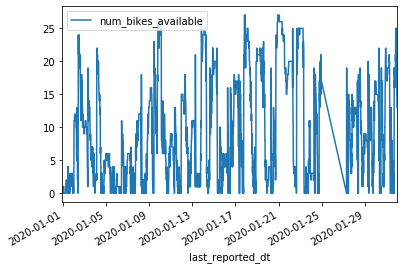

In [18]:
pg_exposicio_plot = pg_exposicio[["last_reported_dt","num_bikes_available"]]
pg_exposicio_plot.plot(x='last_reported_dt', y='num_bikes_available', style='-')

In [27]:
ih_bikes["last_reported_dt"]

200       2019-12-31 22:58:19
610       2019-12-31 23:02:38
1020      2019-12-31 23:07:01
1430      2019-12-31 23:11:23
1840      2019-12-31 23:15:45
                  ...        
3396843   2020-01-31 22:33:29
3397256   2020-01-31 22:37:52
3397669   2020-01-31 22:42:13
3398082   2020-01-31 22:46:37
3398495   2020-01-31 22:50:56
Name: last_reported_dt, Length: 8257, dtype: datetime64[ns]

In [28]:
#We will check Ironhack's closest station and see how does it behave on a regular day.
ironhack = df[df['station_id'] == 211]
ih_bikes = ironhack[["last_reported_dt","num_bikes_available"]]
ih_bikes["last_reported_hours"] = datetime.time(ih_bikes["last_reported_dt"])


ih_bikes["last_reported_hours"]
#ih_bikes_day = ih_bikes[ih_bikes["last_reported_dt"].str.startswith('2020-01-27')]

i#h_bikes_day.plot(x='last_reported_dt', y='num_bikes_available', style='-')

TypeError: cannot convert the series to <class 'int'>

In [30]:
ironhack["last_reported_dt"]

200       2019-12-31 22:58:19
610       2019-12-31 23:02:38
1020      2019-12-31 23:07:01
1430      2019-12-31 23:11:23
1840      2019-12-31 23:15:45
                  ...        
3396843   2020-01-31 22:33:29
3397256   2020-01-31 22:37:52
3397669   2020-01-31 22:42:13
3398082   2020-01-31 22:46:37
3398495   2020-01-31 22:50:56
Name: last_reported_dt, Length: 8257, dtype: datetime64[ns]